In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, zscore

# Load CSV
df = pd.read_csv('C:/Users/pc/Desktop/bhp.csv')

# Display basic info
df.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
# Check column names
print(df.columns)

# Describe price_per_sqft
df['price_per_sqft'].describe()


Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')


count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [4]:
low = df['price_per_sqft'].quantile(0.001)
high = df['price_per_sqft'].quantile(0.999)

df1 = df[(df['price_per_sqft'] >= low) & (df['price_per_sqft'] <= high)]
df1.shape


(13172, 7)

In [5]:
mean = df1['price_per_sqft'].mean()
std = df1['price_per_sqft'].std()

df2 = df1[(df1['price_per_sqft'] >= (mean - 4*std)) & (df1['price_per_sqft'] <= (mean + 4*std))]
df2.shape


(13047, 7)

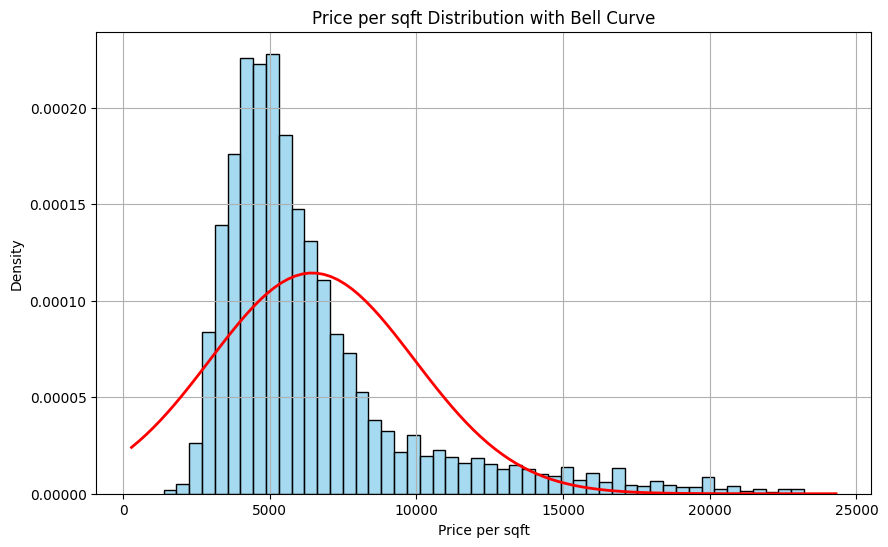

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df2['price_per_sqft'], bins=50, kde=False, stat='density', color='skyblue')

# Bell curve
mean = df2['price_per_sqft'].mean()
std = df2['price_per_sqft'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r', linewidth=2)

plt.title('Price per sqft Distribution with Bell Curve')
plt.xlabel('Price per sqft')
plt.ylabel('Density')
plt.grid()
plt.show()


In [7]:
# Add z-score column
df1['zscore'] = zscore(df1['price_per_sqft'])

# Filter based on zscore
df3 = df1[df1['zscore'].abs() <= 4]
df3.shape


C:\Users\pc\AppData\Local\Temp\ipykernel_19300\981507816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['zscore'] = zscore(df1['price_per_sqft'])


(13047, 8)

In [8]:
# Check if df2 and df3 are same
(df2['price_per_sqft'].reset_index(drop=True) == df3['price_per_sqft'].reset_index(drop=True)).all()


True